In [1]:
# background of SGD
# Neural Network: Hidden layers

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data = pd.get_dummies(data,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [7]:
fc = data.pop('HeartDisease')
data.insert(len(list(data)),'HeartDisease',fc)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


In [14]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(734, 20) (184, 20) (734,) (184,)


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [20]:
x_train

array([[ 1.75354017,  0.40398537, -1.85006457, ..., -0.27612739,
         1.00820807, -0.87431292],
       [-0.81787111, -0.95050604, -1.85006457, ..., -0.27612739,
         1.00820807, -0.87431292],
       [ 1.21782949,  1.48757849,  1.49894114, ..., -0.27612739,
        -0.99185875,  1.14375526],
       ...,
       [ 0.3606924 , -0.24617051,  0.9686819 , ..., -0.27612739,
        -0.99185875,  1.14375526],
       [ 1.11068735,  0.07890743,  0.6895981 , ...,  3.62151689,
        -0.99185875, -0.87431292],
       [-0.71072897, -1.32976364,  0.41051429, ..., -0.27612739,
        -0.99185875,  1.14375526]])

In [21]:
x_test

array([[ 0.20230716, -0.89994479, -1.70632925, ..., -0.25215831,
         0.95742711, -0.84830783],
       [ 1.32722389, -0.63225995,  0.88955598, ..., -0.25215831,
         0.95742711, -0.84830783],
       [-0.20675347, -1.16762963, -1.70632925, ..., -0.25215831,
         0.95742711, -0.84830783],
       ...,
       [-0.10448831, -1.06055569,  0.27066943, ..., -0.25215831,
        -1.04446594,  1.17881737],
       [-1.63846567, -0.09689027,  0.7262387 , ..., -0.25215831,
        -1.04446594,  1.17881737],
       [-0.00222316,  1.50921876, -1.70632925, ..., -0.25215831,
         0.95742711, -0.84830783]])

# Linear regression

In [42]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log",penalty="l2")
clf.fit(x_train,y_train)

SGDClassifier(loss='log')

In [43]:
y_pred = clf.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print("Accuracy Score: %0.2f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.70


In [46]:
import matplotlib.pyplot as plt
import time

C:\Users\AKSHA\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\AKSHA\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\AKSHA\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\AKSHA\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


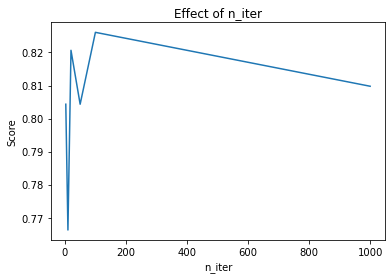

In [48]:
n_iters = [3,10,20,50,100,1000]
scores = []

for n_iter in n_iters:
    clf = SGDClassifier(loss='log',penalty='l2',max_iter=n_iter)
    clf.fit(x_train,y_train)
    scores.append(clf.score(x_test,y_test))
    
plt.title('Effect of n_iter')
plt.xlabel('n_iter')
plt.ylabel('Score')
plt.plot(n_iters,scores)

# Linear SVM

In [49]:
clf = SGDClassifier(loss="hinge",penalty="l2")
clf.fit(x_train,y_train)

SGDClassifier()

In [50]:
y_pred = clf.predict(x_test)

In [51]:
print("Accuracy Score: %0.2f"%accuracy_score(y_test,y_pred))

Accuracy Score: 0.83


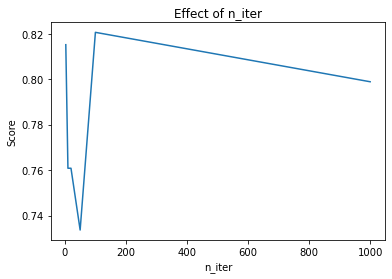

In [52]:
n_iters = [3,10,20,50,100,1000]
scores = []

for n_iter in n_iters:
    clf = SGDClassifier(loss='hinge',penalty='l2')
    clf.fit(x_train,y_train)
    scores.append(clf.score(x_test,y_test))
    
plt.title('Effect of n_iter')
plt.xlabel('n_iter')
plt.ylabel('Score')
plt.plot(n_iters,scores)